## **Principal Component Analysis (PCA)**

**Theory/Concept**

Principal Component Analysis (PCA) is an **unsupervised dimensionality reduction technique.** Its goal is to transform a set of possibly correlated features into a set of linearly uncorrelated features called **principal components.**

**The core idea:**

* Find the directions (principal components) in the data that account for the maximum variance.

* The first principal component accounts for the most variance, the second for the second most (orthogonal to the first), and so on.

* By keeping only the top `k` principal components, you can reduce the dimensionality of the data while retaining as much of the original information (variance) as possible.

**Why reduce dimensionality?**

* **Visualization:** Easier to plot high-dimensional data by reducing it to 2 or 3 components.

* **Storage and Computation:** Reduces memory footprint and speeds up subsequent machine learning algorithms.

* **Noise Reduction:** Can help remove redundant or noisy features.

* **Multicollinearity:** Addresses issues where features are highly correlated.

**Use Cases**

* **Image Compression:** Reducing the size of image data while preserving quality.

* **Feature Engineering/Extraction:** Creating new, uncorrelated features for other ML models.

* **Data Visualization:** Plotting high-dimensional data in 2D or 3D.

* **Noise Reduction in financial data or sensor readings.**

**Pros and Cons**

**Pros:**

* **Reduces dimensionality**, leading to faster training and less memory usage for subsequent models.

* **Can help in visualizing high-dimensional data.**

* **Removes correlated features (addressing multicollinearity).**

* **Reduces overfitting by removing noise.**

**Cons:**

* **Loss of interpretability:** Principal components are linear combinations of original features, making them harder to interpret.

* **Information loss:** Some information is inevitably lost when reducing dimensions.

* **Sensitive to scaling:** Features with larger scales will dominate the principal components.

* **Assumes linearity:** Works best when variance is linearly distributed.

`scikit-learn` **Implementation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load Data
iris = load_iris()
X = iris.data
y = iris.target # We'll use y just for coloring the plot after PCA

In [3]:
# 2. Scale Features (CRUCIAL for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. Instantiate and Apply PCA
# n_components: The number of principal components to keep.
#               Can be an int (e.g., 2), a float (e.g., 0.95 for 95% variance explained), or None.
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

In [5]:
print("\n--- Principal Component Analysis (PCA) ---")
print(f"Original Data Shape: {X.shape}")
print(f"Reduced Data Shape: {X_pca.shape}")



--- Principal Component Analysis (PCA) ---
Original Data Shape: (150, 4)
Reduced Data Shape: (150, 2)


In [6]:
# Explained Variance Ratio
# This tells us how much variance each principal component explains.
print(f"Explained Variance Ratio per component: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance: {np.sum(pca.explained_variance_ratio_):.4f}")

Explained Variance Ratio per component: [0.72962445 0.22850762]
Cumulative Explained Variance: 0.9581


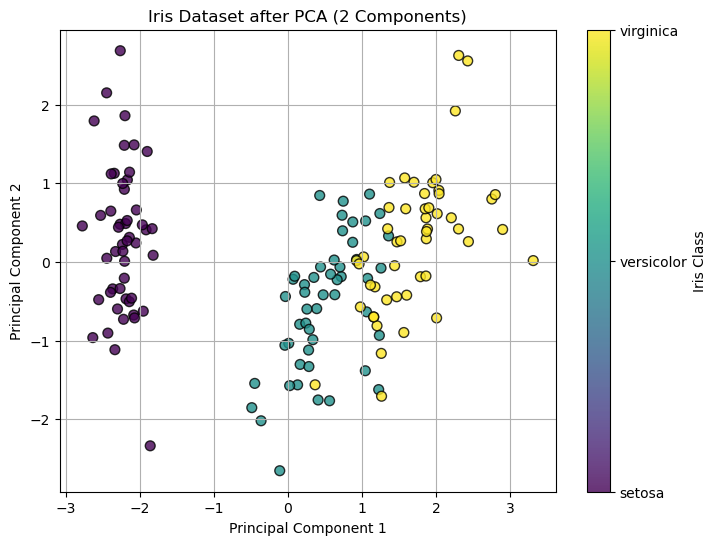

In [7]:
# 4. Visualize the PCA-transformed Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset after PCA (2 Components)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Iris Class', format=plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)]))
plt.grid(True)
plt.show()

In [8]:
# If you wanted to see how many components explain a certain amount of variance:
pca_full = PCA(n_components=None) # Keep all components
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

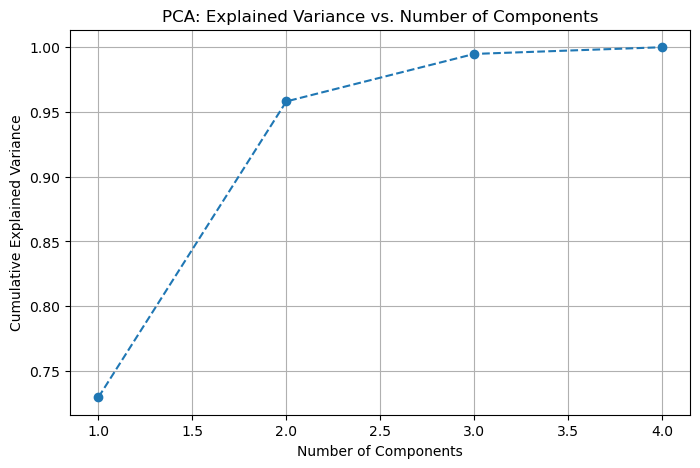

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# From the plot, you can decide how many components to keep (e.g., 95% variance explained)

# Important Hyperparameters for PCA:
# - n_components: (int, float, 'mle', None)
#    - int: number of components to keep.
#    - float (0.0 to 1.0): percentage of variance to explain.
#    - 'mle': automatically estimates the number of components using Minka's MLE.
#    - None: Keep all components.
# - svd_solver: ('auto', 'full', 'arpack', 'randomized') Algorithm to use for SVD computation.
#    'auto' (default) chooses the best one based on data.
#    'randomized' is often good for large datasets and small n_components.